# Free Throw Simulation

### 7-21-20 Activity

In [1]:
# Import libraries and dependencies

from numpy import random
import pandas as pd

%matplotlib inline

In [2]:
# Set the random seed

# random.seed(3) - random seed not needed on this one

In [3]:
# Set number of simulations and free throws

num_simulations = 1000
num_free_throws = 10

# Set a list object acting as a throw: made basket or missed basket

free_throw = ["made", "missed"]

# Set probability of events

probability = [0.7, 0.3]

# Create an empty DataFrame to hold simulation results

results = pd.DataFrame()

# Run n number of simulations

for n in range(num_simulations):

    
    # Set an empty list to hold throw results

    shots = []
    
    # Shoot the ball `10` times

    for i in range(num_free_throws):
        
        
        # Randomly choose between `made` and `missed` with a `70%` chance to make the throw and a `30%` chance the throw is missed

        made_shots = random.choice(free_throw, p=probability)
        
        # Print throw result


       
        # Append throw result to list

        shots.append(made_shots)
   
    # Append column for each simulation and throw results

    results[f"Simulation {n}"] = pd.Series(shots)

# Print the DataFrame

results

,Simulation 0,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,...,Simulation 990,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999
0,made,made,made,made,made,missed,made,missed,made,missed,...,made,made,missed,made,made,made,made,made,made,missed
1,made,made,missed,made,made,made,made,made,made,made,...,made,made,missed,made,made,made,made,made,made,made
2,missed,made,made,missed,made,made,made,made,missed,made,...,made,made,missed,made,made,missed,made,made,made,missed
3,made,made,missed,made,made,made,missed,missed,missed,missed,...,made,missed,made,made,made,made,made,made,made,made
4,missed,made,made,made,missed,made,made,missed,missed,made,...,missed,made,missed,made,made,made,made,missed,missed,made
5,made,missed,made,made,made,missed,made,made,made,made,...,made,made,made,made,made,missed,missed,made,missed,missed
6,missed,missed,made,made,made,made,made,made,missed,missed,...,missed,made,made,made,made,missed,made,made,made,made
7,made,made,made,made,made,made,made,missed,made,missed,...,missed,missed,made,made,made,made,made,made,missed,made
8,missed,made,made,made,missed,made,missed,made,made,made,...,missed,missed,made,made,made,made,made,missed,made,made
9,made,made,missed,made,made,missed,missed,made,missed,made,...,made,made,made,made,missed,made,made,made,missed,missed


In [4]:
# Set empty DataFrame to hold frequency distribution values

freq_dist_df = pd.DataFrame()

# Set empty lists to hold made throws and missed throws results per simulation

made = []
missed = []

# Loop through the results of every simulation

for col in results.columns:
    
    # Use the `value_counts` function to calculate the frequency distribution 
    # of made-to-missed throws for every simulation, returns Series object

    value_count = results[col].value_counts()
    
    # Append results of made and missed throws to respective lists
    # If `made` and `missed key is present in the Series, append both results

    if 'made' in value_count.index and 'missed' in value_count.index:
        made.append(value_count['made'])
        missed.append(value_count['missed'])
        
    # If `made` key is not present in the Series, append made throw list with 0
    # And append missed throw list with missed result (simulation must have returned all missed throws)

    elif 'made' not in value_count.index:
        made.append(0)
        missed.append(value_count['missed'])
        
    # If `missed` key is not present in the Series, append missed throw list with 0
    # And append made throws list with made result (simulation must have returned all made throws)

    elif 'missed' not in value_count.index:
        missed.append(0)
        made.append(value_count['made'])
        
# Create columns from heads and tails lists

freq_dist_df['made'] = made
freq_dist_df['missed'] = missed
freq_dist_df.head()

,made,missed
0,6,4
1,8,2
2,7,3
3,9,1
4,8,2


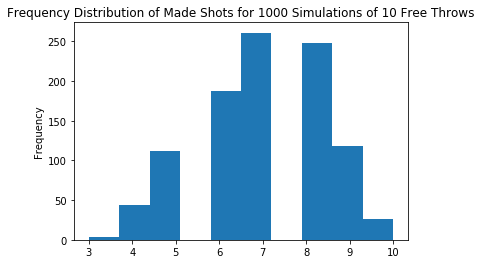

In [8]:
# Plot the data as a histogram

plot_title = f"Frequency Distribution of Made Shots for {num_simulations} Simulations of 10 Free Throws"
freq_dist_df['made'].plot(kind='hist', title=plot_title)

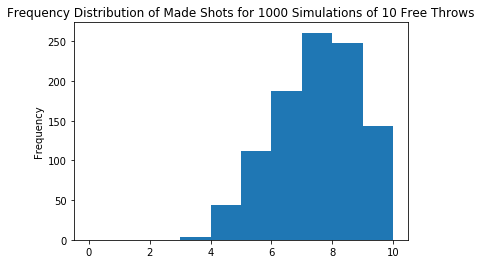

In [9]:
# Plot the data as a histogram but manually set the bin ranges

freq_dist_df['made'].plot.hist(title=plot_title, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Plot Probability Distribution of Made Free Throws for 1000 Simulations of 10 Free Throws

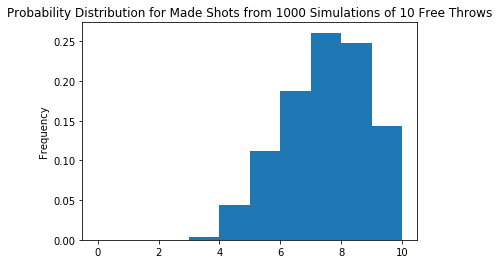

In [10]:
# Plot the data as a histogram with probabilities

plot_title = f"Probability Distribution for Made Shots from {num_simulations} Simulations of 10 Free Throws"
freq_dist_df['made'].plot.hist(density=True, title=plot_title, bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

## What is the Likelihood That the Player Makes `9-10` Free Throws in a Single Session?

    ### roughly 15% based on the probabilities chart